In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
# nltk.download('all')
# nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

E:\Mamba\envs\project\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


ModuleNotFoundError: No module named 'missingno'

In [3]:
# file type trasformation: json to csv
df = pd.read_json('data/arxivData.json')
df.to_csv('data/arxivData.csv', index='id')

In [4]:
arxivData = pd.read_csv('data/arxivData.csv')

In [5]:
arxivData.columns

Index(['Unnamed: 0', 'author', 'day', 'id', 'link', 'month', 'summary', 'tag',
       'title', 'year'],
      dtype='object')

In [6]:
#dropping irrelevant columns
columns_to_delete = ['Unnamed: 0', 'id', 'day', 'month']
arxivData.drop(columns_to_delete, inplace=True, axis=1)

In [7]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [8]:
from ast import literal_eval
# convert 'stringfield' lists to usable structure
features = ['author', 'link', 'tag']
for feature in features:
    arxivData[feature] = arxivData[feature].apply(literal_eval)

In [9]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [10]:
def get_names(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

def get_link(x):
    for i in x:
        return i['href']
    
def get_tag(x):
    if isinstance(x, list):
        terms = [i['term'] for i in x]
        #Check if more than 5 elements exist. If yes, return only first five. If no, return entire list.
        if len(terms) > 5:
            terms = terms[:5]
        return terms


In [11]:
# list transformation
arxivData['author'] = arxivData['author'].apply(get_names)
arxivData['link'] = arxivData['link'].apply(get_link)
arxivData['tag'] = arxivData['tag'].apply(get_tag)

In [12]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[Ahmed Osman, Wojciech Samek]",http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[Ji Young Lee, Franck Dernoncourt]",http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016
2,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesauro]",http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...",http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017
4,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...",http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017


In [13]:
arxivData.shape

(41000, 6)

In [14]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [15]:
# creating clean text feature
features = ['title', 'summary']
for feature in features:
    arxivData['clean_' + feature] = arxivData[feature].apply(clean_text)

In [16]:
arxivData.head()

,author,link,summary,tag,title,year,clean_title,clean_summary
0,"[Ahmed Osman, Wojciech Samek]",http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units for visual ques...,we propose an architecture for vqa which utili...
1,"[Ji Young Lee, Franck Dernoncourt]",http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016,sequential short text classification with recu...,recent approaches based on artificial neural n...
2,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesauro]",http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks an a...,we introduce the multiresolution recurrent neu...
3,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...",http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017,learning what to share between loosely related...,multi task learning is motivated by the observ...
4,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...",http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017,a deep reinforcement learning chatbot,we present milabot a deep reinforcement learni...


In [17]:
arxivData['soup'] = arxivData['clean_title'] + arxivData['clean_summary']

In [18]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

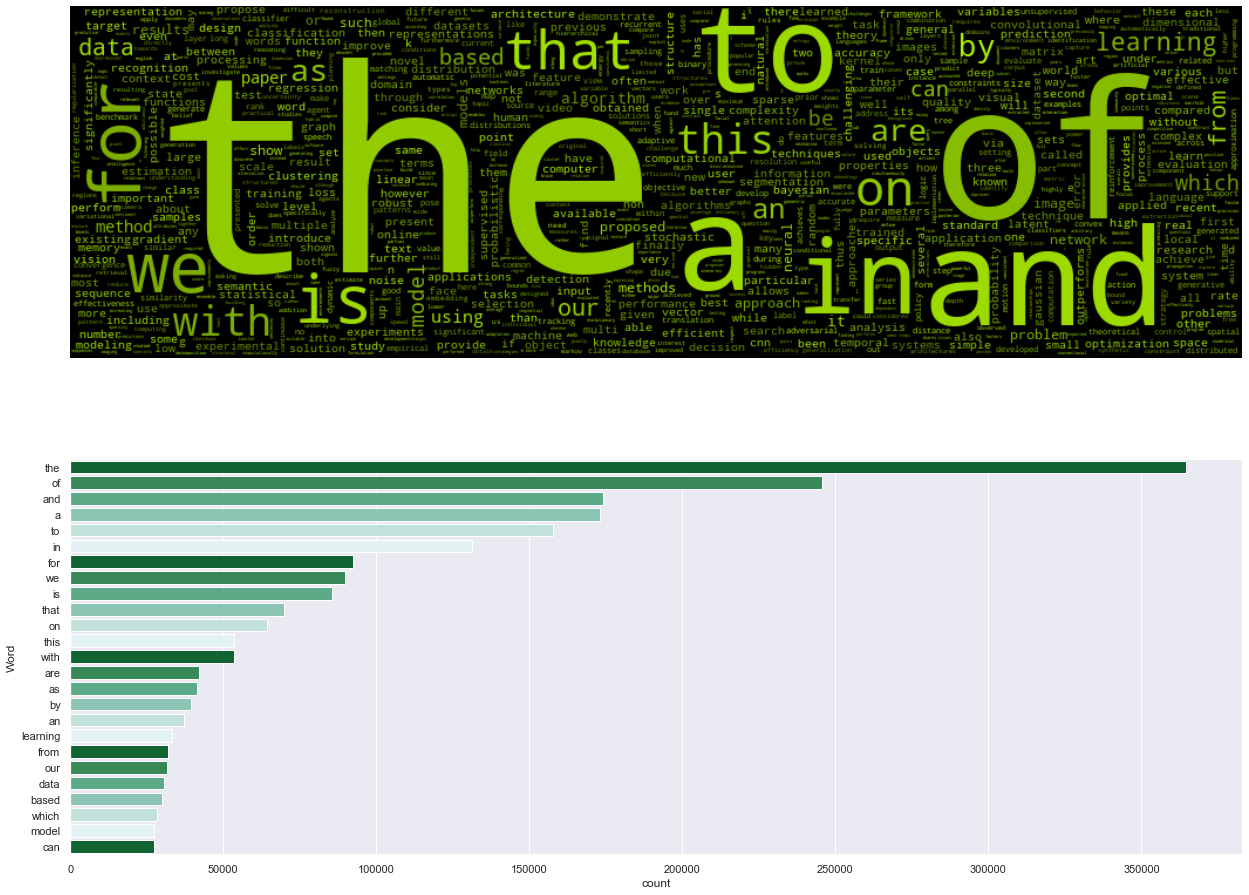

In [19]:
# plot 25 most frequent words including stop words
freq_words(arxivData['soup'], 25)

In [20]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
arxivData['soup'] = arxivData['soup'].apply(lambda x: remove_stopwords(x))

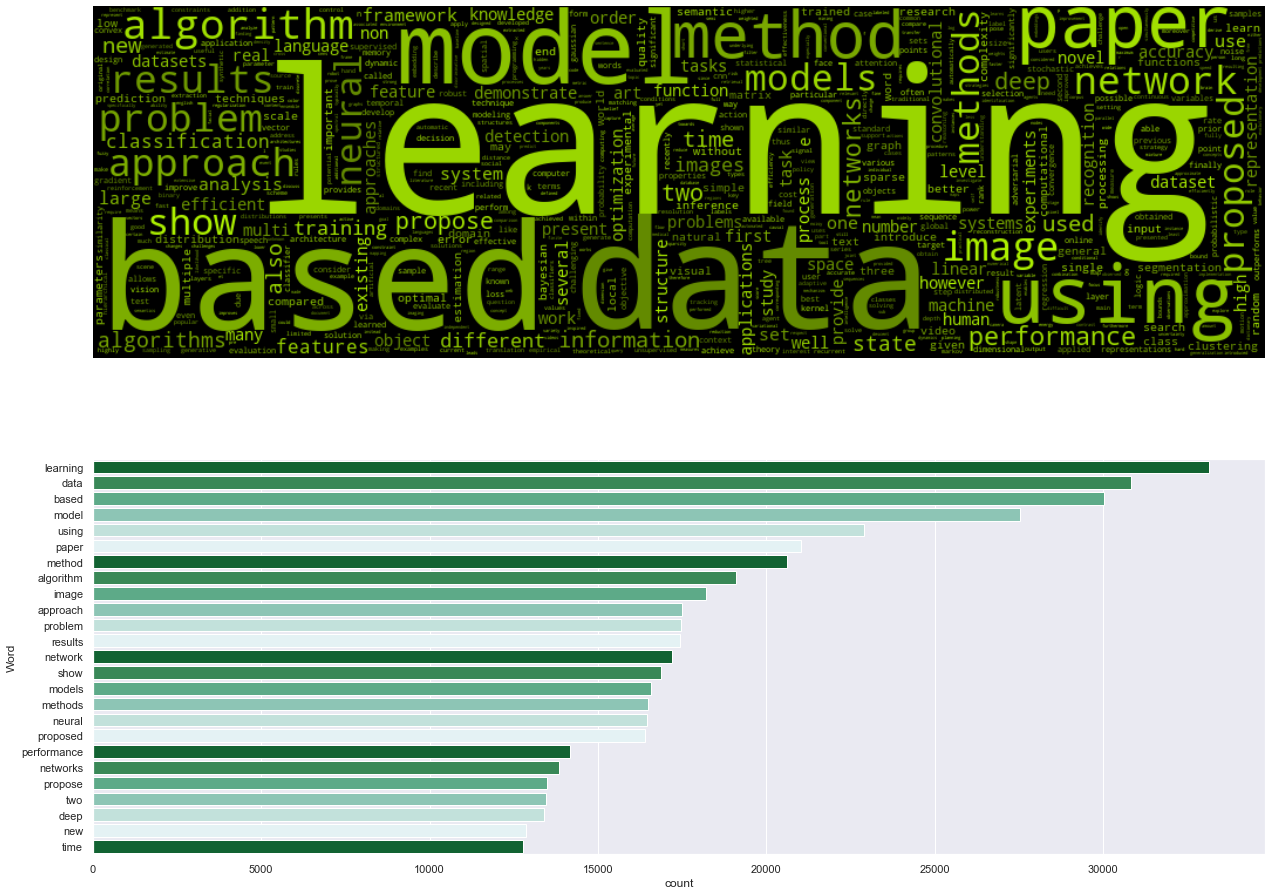

In [21]:
# plot 25 most frequent words without stopwords
freq_words(arxivData['soup'], 25)

In [22]:
# get all genre tags in a list
all_tags = sum(arxivData['tag'],[])
len(set(all_tags))

2167

In [23]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})

In [24]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(7)

,Tag,Count
2,cs.CV,13902
5,cs.LG,13734
0,cs.AI,10481
4,stat.ML,10241
1,cs.CL,6417
3,cs.NE,3817
21,cs.IR,1443


In [25]:
arxivData[['tag', 'year']].head()

,tag,year
0,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",2018
1,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2016
2,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2016
3,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",2017
4,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2017


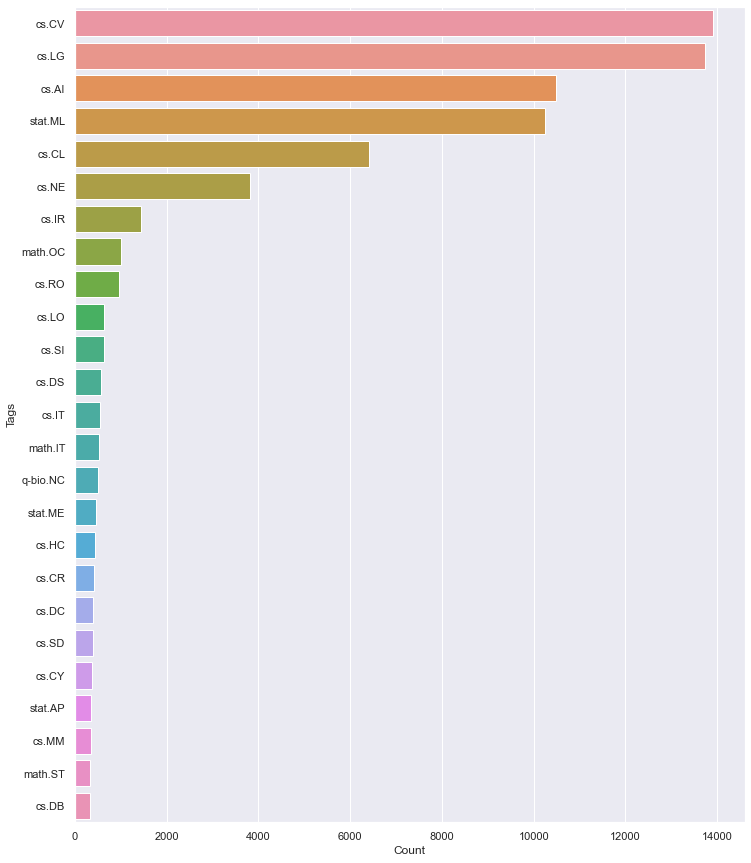

In [26]:
g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

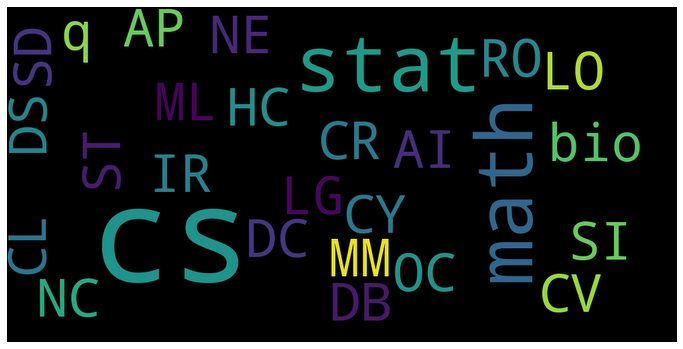

In [27]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

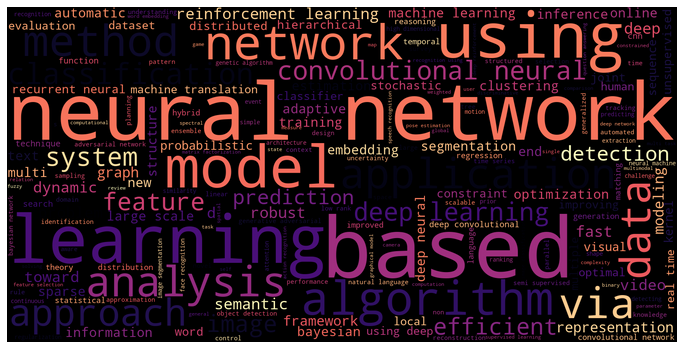

In [28]:
text = " ".join(review for review in arxivData.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

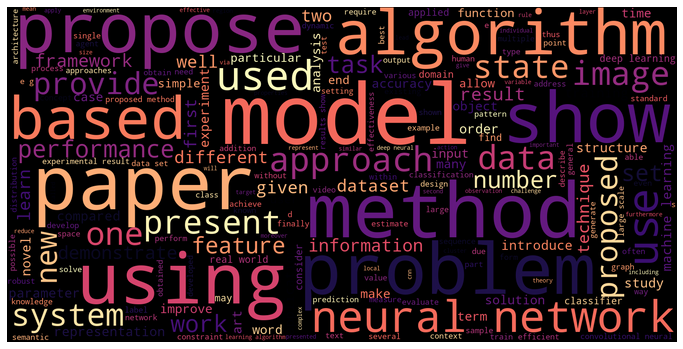

In [29]:
text = " ".join(review for review in arxivData.clean_summary)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [30]:
wordcloud.to_file("first_review.png")

In [31]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [32]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [33]:
arxivData.columns

Index(['author', 'link', 'summary', 'tag', 'title', 'year', 'clean_title',
       'clean_summary', 'soup'],
      dtype='object')

In [34]:
df2 = pd.DataFrame(df.author.str.split('}').tolist(),index = df.index).stack()
df2.head()

0  0            [{'name': 'Ahmed Osman'
   1        , {'name': 'Wojciech Samek'
   2                                  ]
1  0           [{'name': 'Ji Young Lee'
   1    , {'name': 'Franck Dernoncourt'
dtype: object

In [35]:
def rem_unwanted(line):
    return re.sub("\'term'|\'rel'|\'href'|\'type'|\'title'|\[|\{|\'name'|\'|\]|\,|\}",'',line).strip(' ').strip("''").strip(":")

In [36]:
df2 = pd.DataFrame(df2.apply(rem_unwanted))
df2.head()

0
0 0          Ahmed Osman
  1       Wojciech Samek
  2                     
1 0         Ji Young Lee
  1   Franck Dernoncourt

In [37]:
df2 = pd.DataFrame(df2.unstack().iloc[:,0:2].to_records()).drop(columns={'index'})
df2.head()

,"(0, 0)","(0, 1)"
0,Ahmed Osman,Wojciech Samek
1,Ji Young Lee,Franck Dernoncourt
2,Iulian Vlad Serban,Tim Klinger
3,Sebastian Ruder,Joachim Bingel
4,Iulian V. Serban,Chinnadhurai Sankar


In [38]:
df2.columns = ['Author1','Author2']
df2.Author1 = df2.Author1.str.strip(' ')
df2.Author2 = df2.Author2.str.strip(' ')

In [39]:
df2[df2.Author2 == '']
df2 = df2.reset_index().drop(columns='index')
df2.head()

,Author1,Author2
0,Ahmed Osman,Wojciech Samek
1,Ji Young Lee,Franck Dernoncourt
2,Iulian Vlad Serban,Tim Klinger
3,Sebastian Ruder,Joachim Bingel
4,Iulian V. Serban,Chinnadhurai Sankar


In [40]:
arxivData = pd.merge(arxivData,df2,how = 'inner',left_index=True,right_index=True).drop('author',axis=1)
arxivData.head()

,link,summary,tag,title,year,clean_title,clean_summary,soup,Author1,Author2
0,http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units for visual ques...,we propose an architecture for vqa which utili...,dual recurrent attention units visual question...,Ahmed Osman,Wojciech Samek
1,http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016,sequential short text classification with recu...,recent approaches based on artificial neural n...,sequential short text classification recurrent...,Ji Young Lee,Franck Dernoncourt
2,http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks an a...,we introduce the multiresolution recurrent neu...,multiresolution recurrent neural networks appl...,Iulian Vlad Serban,Tim Klinger
3,http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017,learning what to share between loosely related...,multi task learning is motivated by the observ...,learning share loosely related tasksmulti task...,Sebastian Ruder,Joachim Bingel
4,http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017,a deep reinforcement learning chatbot,we present milabot a deep reinforcement learni...,deep reinforcement learning chatbotwe present ...,Iulian V. Serban,Chinnadhurai Sankar


In [41]:
arxivData=arxivData[:1000]

In [42]:
mb = MultiLabelBinarizer()
mb.fit(arxivData['tag'])

y = mb.transform(arxivData['tag'])

In [43]:
len(y)

1000

In [44]:
len(arxivData['soup'])

1000

## Recommender based on summary

In [45]:
arxivData['clean_summary'].head()

0    we propose an architecture for vqa which utili...
1    recent approaches based on artificial neural n...
2    we introduce the multiresolution recurrent neu...
3    multi task learning is motivated by the observ...
4    we present milabot a deep reinforcement learni...
Name: clean_summary, dtype: object

In [46]:
# TfIdf matrix transformation on clean_summary column
tfidf_matrix = tfidf_vec.fit_transform(arxivData['clean_summary'])
# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [47]:
indices = pd.Series(arxivData.index, index=arxivData['title']).drop_duplicates()

In [48]:
def get_recommendations(title, similarity):
    
    idx = indices[title]
    # pairwsie similarity scores
    sim_scores = list(enumerate(similarity[idx]))
    # sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    article_indices = [i[0] for i in sim_scores]
    # Return the top 10 most related articles
    return arxivData[['link', 'title', 'Author1', 'Author2']].iloc[article_indices]

In [49]:
get_recommendations('Towards Bayesian Deep Learning: A Survey', cosine_sim)

,link,title,Author1,Author2
219,http://arxiv.org/abs/1608.06884v2,Towards Bayesian Deep Learning: A Framework an...,Hao Wang,Dit-Yan Yeung
384,http://arxiv.org/abs/1709.05870v1,ZhuSuan: A Library for Bayesian Deep Learning,Jiaxin Shi,Jianfei Chen
211,http://arxiv.org/abs/1504.00641v1,A Probabilistic Theory of Deep Learning,Ankit B. Patel,Tan Nguyen
356,http://dx.doi.org/10.1109/MSP.2017.2743240,A Brief Survey of Deep Reinforcement Learning,Kai Arulkumaran,Marc Peter Deisenroth
36,http://arxiv.org/abs/1611.00448v1,Natural-Parameter Networks: A Class of Probabi...,Hao Wang,Xingjian Shi
656,http://arxiv.org/abs/1210.8442v3,Linear-Nonlinear-Poisson Neuron Networks Perfo...,Louis Yuanlong Shao,
873,http://arxiv.org/abs/1409.2574v4,Deep Unfolding: Model-Based Inspiration of Nov...,John R. Hershey,Jonathan Le Roux
664,http://arxiv.org/abs/1708.08296v1,Explainable Artificial Intelligence: Understan...,Wojciech Samek,Thomas Wiegand
870,http://arxiv.org/abs/1312.5847v3,Deep learning for neuroimaging: a validation s...,Sergey M. Plis,Devon R. Hjelm
893,http://arxiv.org/abs/1511.06499v4,The Variational Gaussian Process,Dustin Tran,Rajesh Ranganath


## Recommender based on tags, author, and title

In [50]:
# convert all strings to lower case & strip names of spaces
def clean_lists(text):
    if isinstance(text, list):
        return [str.lower(i.replace(" ", "")) for i in text]
    else:
        if isinstance(text, str):
            return str.lower(text.replace(" ", ""))
        else:
            return ''

features = ['tag', 'Author2']
for feature in features:
    arxivData[feature] = arxivData[feature].apply(clean_lists)

In [59]:
# create soup to vectorization process
def create_soup(text):
    return ' '.join(text['tag']) + ' ' + ' '.join(text['Author1'])+ ' ' + ' '.join(text['Author2']) + ' ' + ' '.join(text['title'])

arxivData['soup2'] = arxivData.apply(create_soup, axis=1)

In [60]:
arxivData['soup2']

0      cs.ai cs.cl cs.cv cs.ne stat.ml A h m e d   O ...
1      cs.cl cs.ai cs.lg cs.ne stat.ml J i   Y o u n ...
2      cs.cl cs.ai cs.lg cs.ne stat.ml I u l i a n   ...
3      stat.ml cs.ai cs.cl cs.lg cs.ne S e b a s t i ...
4      cs.cl cs.ai cs.lg cs.ne stat.ml I u l i a n   ...
                             ...                        
995    cs.lg cs.ne stat.ml Z h i g u a n g   W a n g ...
996    cs.lg cs.ne stat.ml B a r t   v a n   M e r r ...
997    cs.lg cs.ne stat.ml Z h i g u a n g   W a n g ...
998    cond-mat.dis-nn cs.lg cs.ne stat.ml M a r y l ...
999    stat.ml cs.cg cs.lg cs.ne O r i o l   V i n y ...
Name: soup2, Length: 1000, dtype: object

In [61]:
# CountVectorizer object's defined at the beginning of Part 3-text mining alg. section
count_matrix = count_vec.fit_transform(arxivData['soup2']) 
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [62]:
get_recommendations('Towards Bayesian Deep Learning: A Survey', cosine_sim2)

,link,title,Author1,Author2
13,http://arxiv.org/abs/1604.01662v2,Towards Bayesian Deep Learning: A Survey,Hao Wang,dit-yanyeung
14,http://arxiv.org/abs/1604.06057v2,Hierarchical Deep Reinforcement Learning: Inte...,Tejas D. Kulkarni,karthikr.narasimhan
15,http://arxiv.org/abs/1612.06370v2,Learning Features by Watching Objects Move,Deepak Pathak,rossgirshick
16,http://arxiv.org/abs/1409.6041v1,Domain Adaptive Neural Networks for Object Rec...,Muhammad Ghifary,w.bastiaankleijn
17,http://arxiv.org/abs/1506.01911v3,Beyond Temporal Pooling: Recurrence and Tempor...,Lionel Pigou,aäronvandenoord
18,http://arxiv.org/abs/1509.05962v2,Telugu OCR Framework using Deep Learning,Rakesh Achanta,trevorhastie
19,http://arxiv.org/abs/1605.09782v7,Adversarial Feature Learning,Jeff Donahue,philippkrähenbühl
20,http://arxiv.org/abs/1606.03490v3,The Mythos of Model Interpretability,Zachary C. Lipton,
21,http://arxiv.org/abs/1701.06106v2,Neurogenesis-Inspired Dictionary Learning: Onl...,Sahil Garg,irinarish
22,http://arxiv.org/abs/1702.08690v2,Borrowing Treasures from the Wealthy: Deep Tra...,Weifeng Ge,yizhouyu


In [63]:
get_recommendations('A Deep Reinforcement Learning Chatbot', cosine_sim2)

,link,title,Author1,Author2
2,http://arxiv.org/abs/1606.00776v2,Multiresolution Recurrent Neural Networks: An ...,Iulian Vlad Serban,timklinger
3,http://arxiv.org/abs/1705.08142v2,Learning what to share between loosely related...,Sebastian Ruder,joachimbingel
4,http://arxiv.org/abs/1709.02349v2,A Deep Reinforcement Learning Chatbot,Iulian V. Serban,chinnadhuraisankar
5,http://arxiv.org/abs/1709.08878v1,Generating Sentences by Editing Prototypes,Kelvin Guu,tatsunorib.hashimoto
6,http://arxiv.org/abs/1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...,Iulian V. Serban,chinnadhuraisankar
438,http://arxiv.org/abs/1710.10704v3,Training Probabilistic Spiking Neural Networks...,Alireza Bagheri,osvaldosimeone
38,http://arxiv.org/abs/1604.04562v3,A Network-based End-to-End Trainable Task-orie...,Tsung-Hsien Wen,davidvandyke
39,http://arxiv.org/abs/1604.05878v1,A Factorization Machine Framework for Testing ...,Johannes Welbl,guillaumebouchard
40,http://arxiv.org/abs/1612.05251v1,Neural Networks for Joint Sentence Classificat...,Franck Dernoncourt,jiyounglee
41,http://arxiv.org/abs/1606.03475v1,De-identification of Patient Notes with Recurr...,Franck Dernoncourt,jiyounglee
